In [ ]:
#LOADING THE DATASET

import numpy as np
import os
import pickle
from tensorflow.keras.utils import to_categorical

def load_batch(filepath):
    with open(filepath, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
    data = batch['data']
    labels = batch['labels']
    data = data.reshape((len(data), 3, 32, 32)).transpose(0, 2, 3, 1)  # Convert to (N, 32, 32, 3)
    return data, labels

def load_cifar10_data(data_dir):
    x_train, y_train = [], []
    for i in range(1, 6):
        data, labels = load_batch(os.path.join(data_dir, f'data_batch_{i}'))
        x_train.append(data)
        y_train.extend(labels)

    x_train = np.concatenate(x_train)
    y_train = np.array(y_train)

    x_test, y_test = load_batch(os.path.join(data_dir, 'test_batch'))
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    return (x_train, y_train), (x_test, y_test)

# 🔄 Load dataset
data_dir = '/Users/ahmetyasirbeydili/Desktop/introToML/cifar-10-batches-py'
(x_train, y_train), (x_test, y_test) = load_cifar10_data(data_dir)

# 🔢 Normalize image data to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 🎯 One-hot encode labels
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ✅ Sanity check
print("x_train shape:", x_train.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("x_test shape:", x_test.shape)
print("y_test_cat shape:", y_test_cat.shape)


x_train shape: (50000, 32, 32, 3)
y_train_cat shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test_cat shape: (10000, 10)


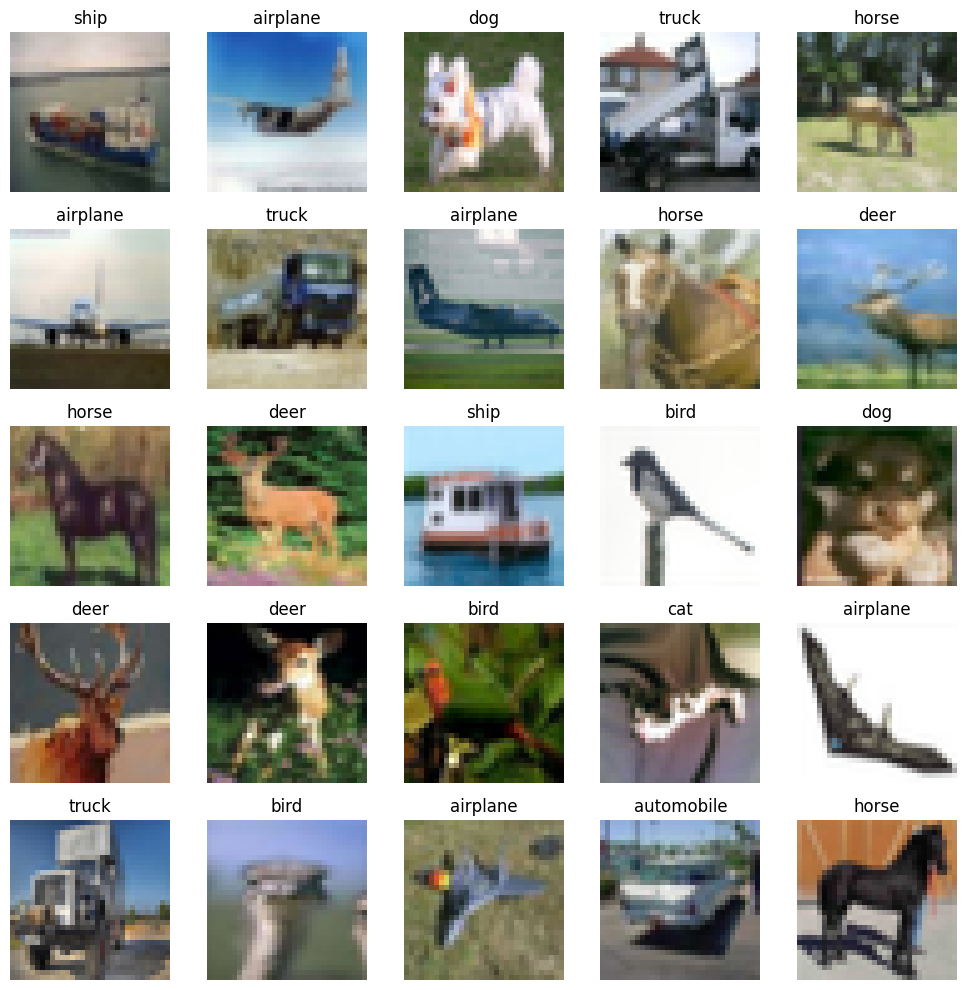

In [ ]:
#DATA EXPLORING 

import matplotlib.pyplot as plt
import numpy as np

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot random 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
    idx = np.random.randint(0, len(x_train))
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[y_train[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()


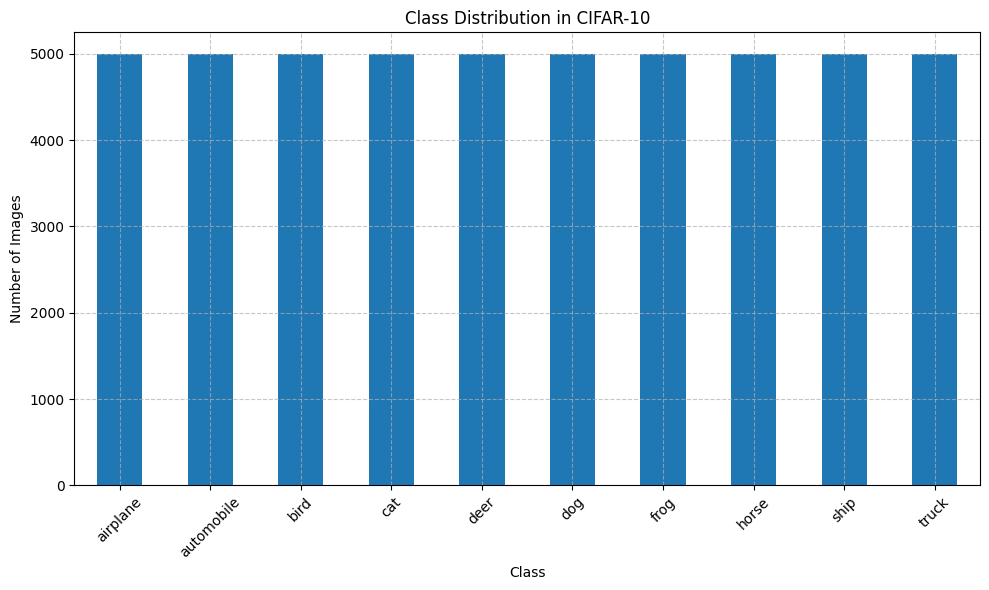

In [ ]:
#DATA EXPLORING MORE

import pandas as pd
import matplotlib.pyplot as plt

# Map integer labels to class names
y_train_labels = [class_names[label] for label in y_train]

# Create a DataFrame
df_labels = pd.DataFrame(y_train_labels, columns=['Class'])

# Plot
plt.figure(figsize=(10, 6))
df_labels['Class'].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution in CIFAR-10')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


MLP PART

In [20]:
#BASE MLP CODE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Flatten the images for MLP input
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Build MLP model
mlp_model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile
mlp_model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train
history_mlp = mlp_model.fit(
    x_train_flat, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_data=(x_test_flat, y_test_cat)
)


/Users/ahmetyasirbeydili/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.2641 - loss: 2.0263 - val_accuracy: 0.3666 - val_loss: 1.7706
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.3831 - loss: 1.7109 - val_accuracy: 0.4305 - val_loss: 1.5948
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.4261 - loss: 1.6014 - val_accuracy: 0.4435 - val_loss: 1.5446
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4467 - loss: 1.5478 - val_accuracy: 0.4716 - val_loss: 1.5069
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4671 - loss: 1.4880 - val_accuracy: 0.4654 - val_loss: 1.4963
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.4752 - loss: 1.4657 - val_accuracy: 0.4553 - val_loss: 1.5162
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4940 - loss: 1.4193 - val_accuracy: 0.4626 - val_loss: 1.5024
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.5000 - loss: 1.3922 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.4981
Precision: 0.5088
Recall: 0.4981
F1-Score: 0.4965
MCC: 0.4438

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.50      0.56      1000
           1       0.62      0.57      0.59      1000
           2       0.42      0.32      0.36      1000
           3       0.33      0.42      0.37      1000
           4       0.50      0.38      0.43      1000
           5       0.40      0.35      0.38      1000
           6       0.50      0.61      0.55      1000
           7       0.52      0.62      0.57      1000
           8       0.69      0.55      0.61      1000
           9       0.46      0.66      0.54      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000



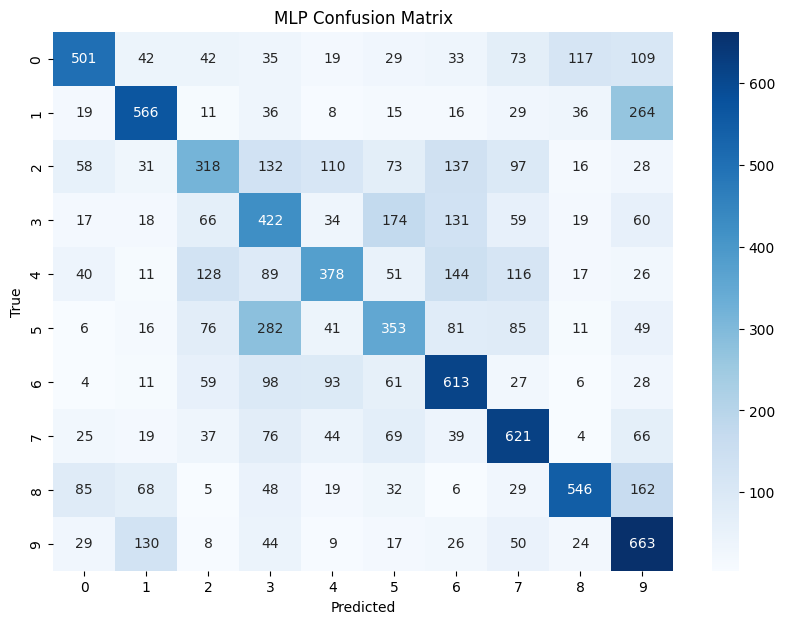

In [ ]:
#PRINTING MLP SCORES

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict class labels
y_pred_mlp_probs = mlp_model.predict(x_test_flat)
y_pred_mlp = np.argmax(y_pred_mlp_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Compute metrics
accuracy = accuracy_score(y_true, y_pred_mlp)
precision = precision_score(y_true, y_pred_mlp, average='macro')
recall = recall_score(y_true, y_pred_mlp, average='macro')
f1 = f1_score(y_true, y_pred_mlp, average='macro')
mcc = matthews_corrcoef(y_true, y_pred_mlp)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred_mlp))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_mlp)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


CNN PART

In [ ]:
#BASE CNN CODE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Build the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile
cnn_model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
history = cnn_model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=10,
    batch_size=64
)



Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - accuracy: 0.3355 - loss: 1.7805 - val_accuracy: 0.5279 - val_loss: 1.3049
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.5683 - loss: 1.2129 - val_accuracy: 0.5965 - val_loss: 1.1218
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6286 - loss: 1.0466 - val_accuracy: 0.6567 - val_loss: 0.9848
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6848 - loss: 0.8985 - val_accuracy: 0.6739 - val_loss: 0.9288
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.7167 - loss: 0.8136 - val_accuracy: 0.6974 - val_loss: 0.8809
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.7439 - loss: 0.7292 - val_accuracy: 0.7113 - val_loss: 0.8368
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7678 - loss: 0.6609 - val_accuracy: 0.6803 - val_loss: 0.9545
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.7838 - loss: 0.6132 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
🎯 CNN Evaluation:
Accuracy: 0.7133
Precision: 0.7300
Recall: 0.7133
F1-Score: 0.7137
MCC: 0.6830

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.76      1000
           1       0.79      0.87      0.83      1000
           2       0.55      0.70      0.62      1000
           3       0.48      0.62      0.54      1000
           4       0.68      0.67      0.68      1000
           5       0.75      0.43      0.55      1000
           6       0.81      0.79      0.80      1000
           7       0.81      0.72      0.76      1000
           8       0.79      0.85      0.82      1000
           9       0.89      0.69      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.73      0.71      0.71     10000



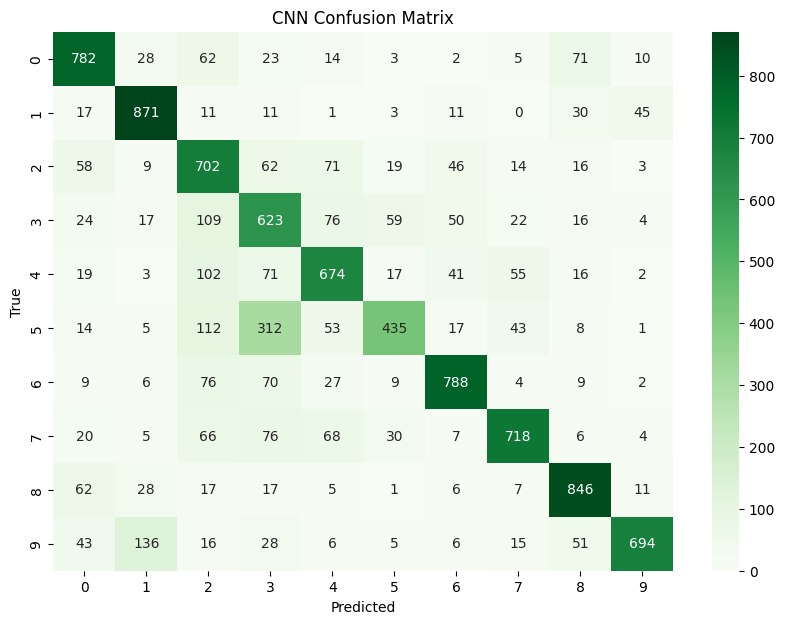

In [ ]:
#PRINTING CNN SCORES

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities and convert to class labels
y_pred_cnn_probs = cnn_model.predict(x_test)
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Compute metrics
accuracy = accuracy_score(y_true, y_pred_cnn)
precision = precision_score(y_true, y_pred_cnn, average='macro')
recall = recall_score(y_true, y_pred_cnn, average='macro')
f1 = f1_score(y_true, y_pred_cnn, average='macro')
mcc = matthews_corrcoef(y_true, y_pred_cnn)

# Print results
print(" CNN Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred_cnn))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_cnn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


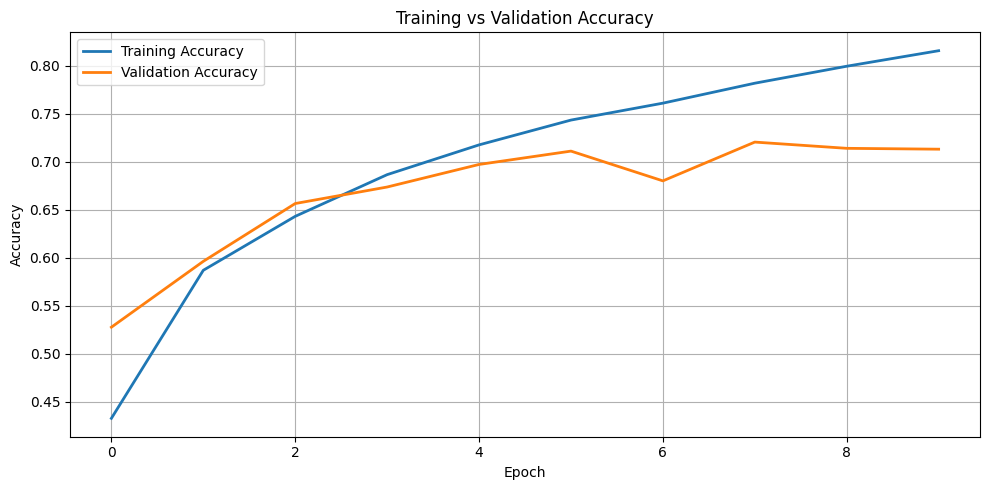

In [6]:
# Plot Training vs Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


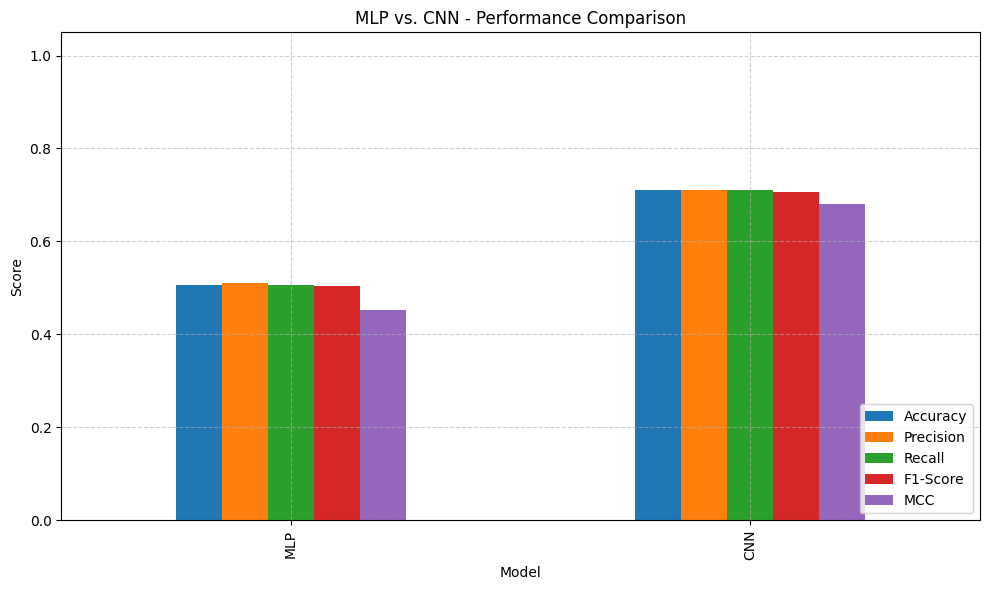

In [ ]:
# Store MLP and CNN results
metrics_comparison = {
    "Model": ["MLP", "CNN"],
    "Accuracy": [accuracy_score(y_true, y_pred_mlp), accuracy_score(y_true, y_pred_cnn)],
    "Precision": [precision_score(y_true, y_pred_mlp, average='macro'), precision_score(y_true, y_pred_cnn, average='macro')],
    "Recall": [recall_score(y_true, y_pred_mlp, average='macro'), recall_score(y_true, y_pred_cnn, average='macro')],
    "F1-Score": [f1_score(y_true, y_pred_mlp, average='macro'), f1_score(y_true, y_pred_cnn, average='macro')],
    "MCC": [matthews_corrcoef(y_true, y_pred_mlp), matthews_corrcoef(y_true, y_pred_cnn)],
}

import pandas as pd

# Create DataFrame
comparison_df = pd.DataFrame(metrics_comparison)

# Set 'Model' as index
comparison_df.set_index("Model", inplace=True)

# Plot
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("MLP vs. CNN - Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


TRYING WITH DIFFERENT PARAMETERS TO OPTIMIZE MODELS

OPTIMIZING AND EXPLORING CNN ALGORITHM

In [7]:
#COMPARISON WITH BASE RESULTS 
#WITH NORMALIZATION AND DROPOUT

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and normalize CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize to [0, 1]
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# CNN Model with Dropout
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
cnn_model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
history = cnn_model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=20,
    batch_size=64
)


/Users/ahmetyasirbeydili/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.2631 - loss: 1.9675 - val_accuracy: 0.5264 - val_loss: 1.3146
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5017 - loss: 1.3899 - val_accuracy: 0.6076 - val_loss: 1.1413
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5555 - loss: 1.2563 - val_accuracy: 0.6169 - val_loss: 1.0761
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5978 - loss: 1.1533 - val_accuracy: 0.6542 - val_loss: 0.9871
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.6111 - loss: 1.1026 - val_accuracy: 0.6640 - val_loss: 0.9632
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.6328 - loss: 1.0457 - val_accuracy: 0.6858 - val_loss: 0.9128
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6467 - loss: 1.0173 - val_accuracy: 0.6974 - val_loss: 0.8624
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.6568 - loss: 0.9863 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
🎯 CNN Evaluation (Norm + Dropout):
Accuracy: 0.7484
Precision: 0.7499
Recall: 0.7484
F1-Score: 0.7453
MCC: 0.7214

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.90      0.86      0.88      1000
           2       0.69      0.57      0.62      1000
           3       0.63      0.50      0.56      1000
           4       0.65      0.73      0.69      1000
           5       0.69      0.63      0.66      1000
           6       0.65      0.90      0.75      1000
           7       0.83      0.77      0.80      1000
           8       0.84      0.88      0.86      1000
           9       0.85      0.84      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



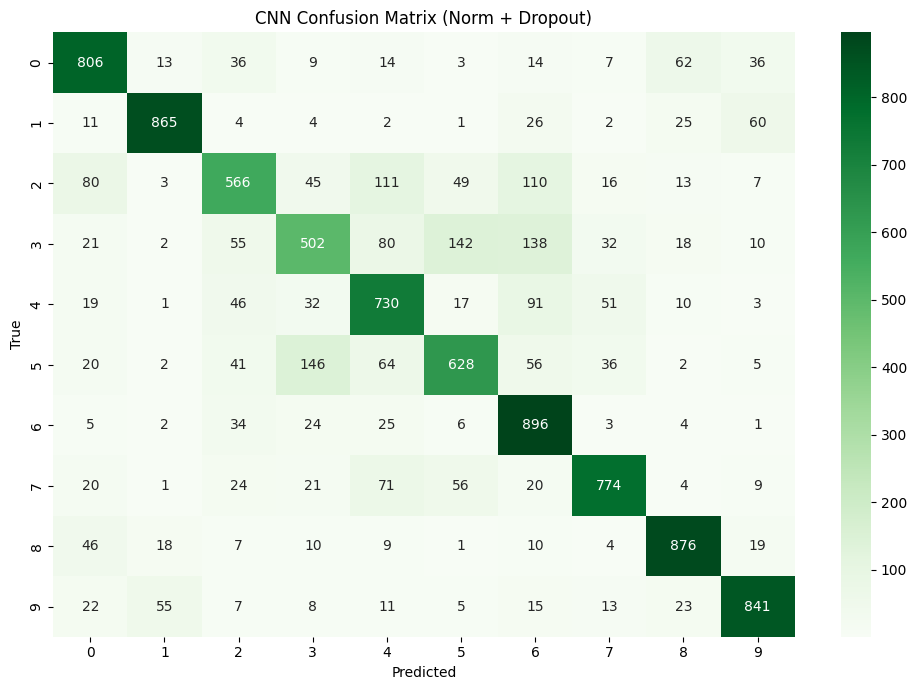

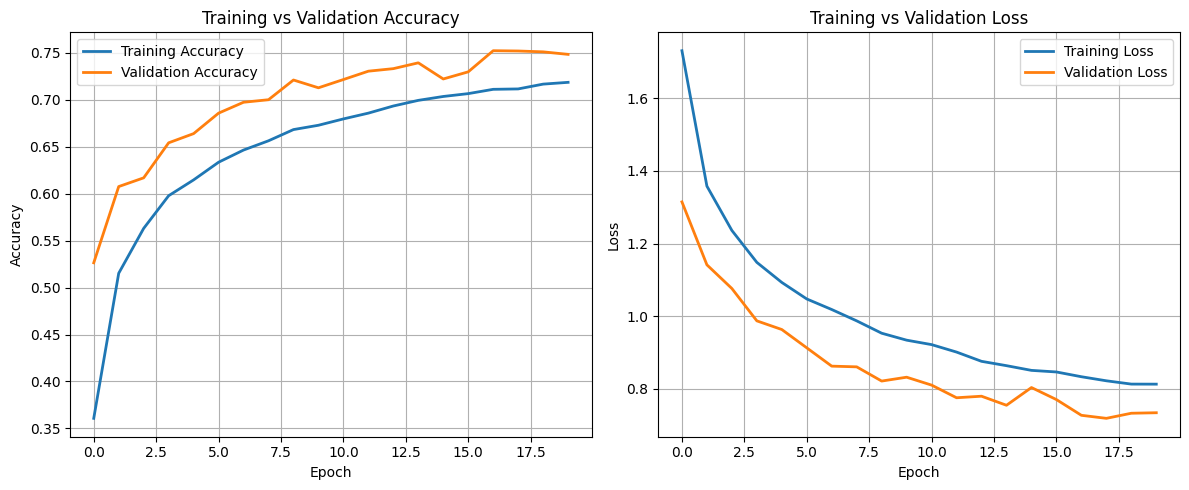

🟡 MLP results not available. Skipping comparison plot.


In [ ]:
#OUTPUTS OF THE COMPARISON WITH BASE RESULRS

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Predictions ---
y_pred_cnn_probs = cnn_model.predict(x_test)
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# --- Metrics ---
accuracy = accuracy_score(y_true, y_pred_cnn)
precision = precision_score(y_true, y_pred_cnn, average='macro')
recall = recall_score(y_true, y_pred_cnn, average='macro')
f1 = f1_score(y_true, y_pred_cnn, average='macro')
mcc = matthews_corrcoef(y_true, y_pred_cnn)

print("🎯 CNN Evaluation (Norm + Dropout):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred_cnn))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred_cnn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("CNN Confusion Matrix (Norm + Dropout)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# --- Training vs Validation Accuracy & Loss ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Comparison Bar Chart (Optional: requires MLP results) ---
try:
    metrics_comparison = {
        "Model": ["MLP", "CNN (Norm + Dropout)"],
        "Accuracy": [accuracy_score(y_true, y_pred_mlp), accuracy],
        "Precision": [precision_score(y_true, y_pred_mlp, average='macro'), precision],
        "Recall": [recall_score(y_true, y_pred_mlp, average='macro'), recall],
        "F1-Score": [f1_score(y_true, y_pred_mlp, average='macro'), f1],
        "MCC": [matthews_corrcoef(y_true, y_pred_mlp), mcc],
    }

    comparison_df = pd.DataFrame(metrics_comparison).set_index("Model")
    comparison_df.plot(kind='bar', figsize=(10, 6))
    plt.title("MLP vs. CNN (Norm + Dropout) - Performance Comparison")
    plt.ylabel("Score")
    plt.ylim(0, 1.05)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
except:
    print("🟡 MLP results not available. Skipping comparison plot.")


/Users/ahmetyasirbeydili/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - accuracy: 0.2703 - loss: 2.0644 - val_accuracy: 0.4341 - val_loss: 1.6234
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.4025 - loss: 1.6342 - val_accuracy: 0.5313 - val_loss: 1.3055
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.4683 - loss: 1.4748 - val_accuracy: 0.5839 - val_loss: 1.1565
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5023 - loss: 1.3978 - val_accuracy: 0.5698 - val_loss: 1.3238
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5267 - loss: 1.3216 - val_accuracy: 0.6313 - val_loss: 1.0593
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5498 - loss: 1.2741 - val_accuracy: 0.6203 - val_loss: 1.0769
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5653 - loss: 1.2349 - val_accuracy: 0.6573 - val_loss: 0.9986
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5826 - loss: 1.1820 - 

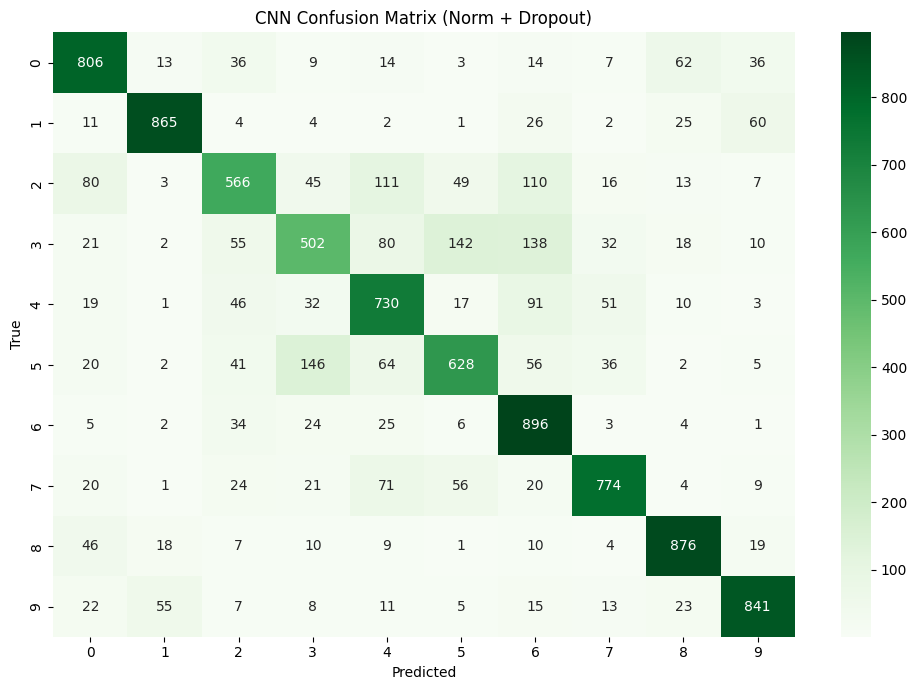

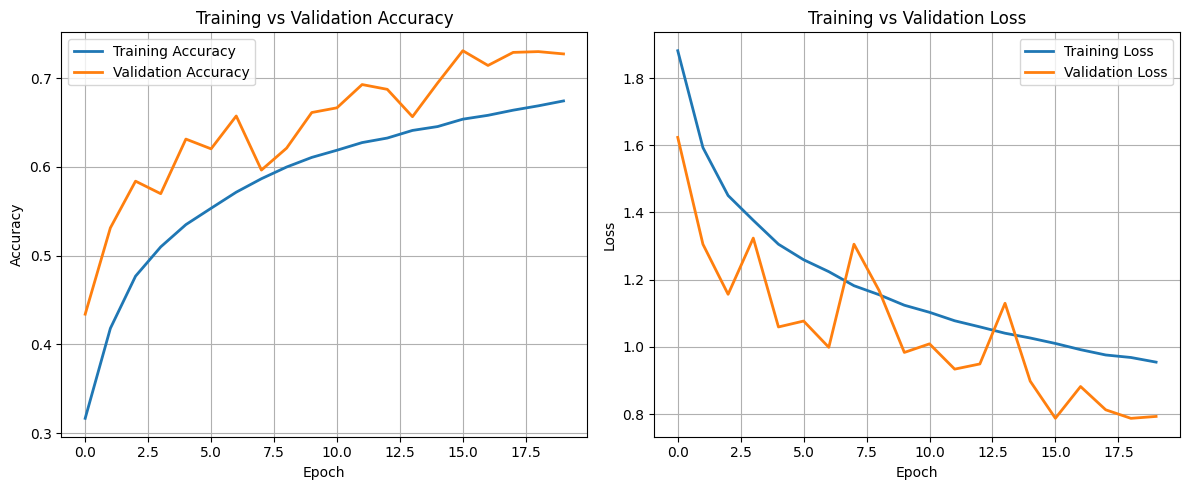

🟡 MLP results not available. Skipping comparison plot.


In [ ]:
#Model Code with Augmentation, Batch Norm, and Dropout
#BAD TUNING

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, InputLayer
)
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast


data_augmentation = Sequential([
    InputLayer(input_shape=(32, 32, 3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomContrast(0.1),
])

# Build CNN model
cnn_aug_model = Sequential([
    data_augmentation,

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
cnn_aug_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = cnn_aug_model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=20,
    batch_size=64
)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
📊 CNN Evaluation (Norm + Dropout + Aug):
Accuracy: 0.7272
Precision: 0.7303
Recall: 0.7272
F1-Score: 0.7209
MCC: 0.6987

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      1000
           1       0.86      0.87      0.87      1000
           2       0.64      0.62      0.63      1000
           3       0.60      0.42      0.50      1000
           4       0.77      0.56      0.64      1000
           5       0.76      0.58      0.66      1000
           6       0.62      0.89      0.73      1000
           7       0.73      0.83      0.78      1000
           8       0.87      0.82      0.85      1000
           9       0.73      0.86      0.79      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



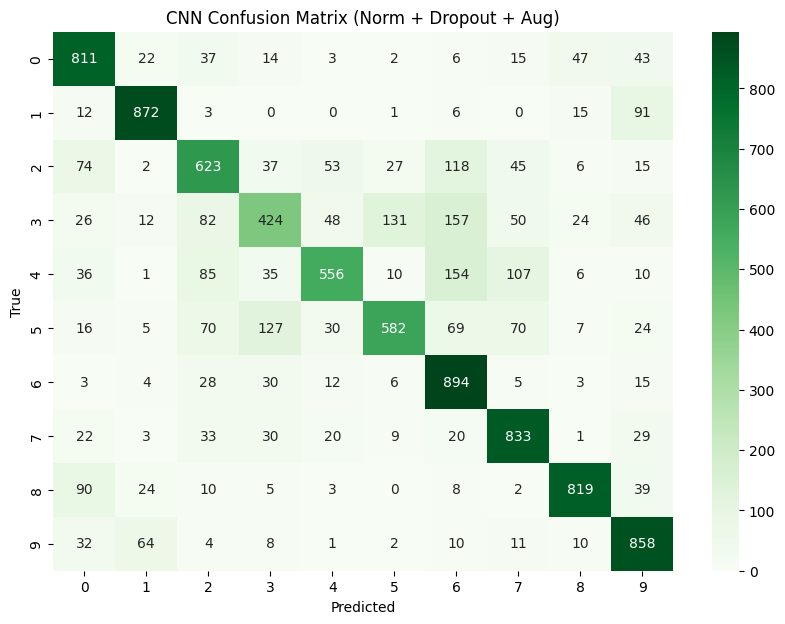

In [ ]:
#OUTPUTS

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#  Predict and evaluate
y_pred_probs = cnn_aug_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

#  Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
mcc = matthews_corrcoef(y_true, y_pred)

print("📊 CNN Evaluation (Norm + Dropout + Aug):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("CNN Confusion Matrix (Norm + Dropout + Aug)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


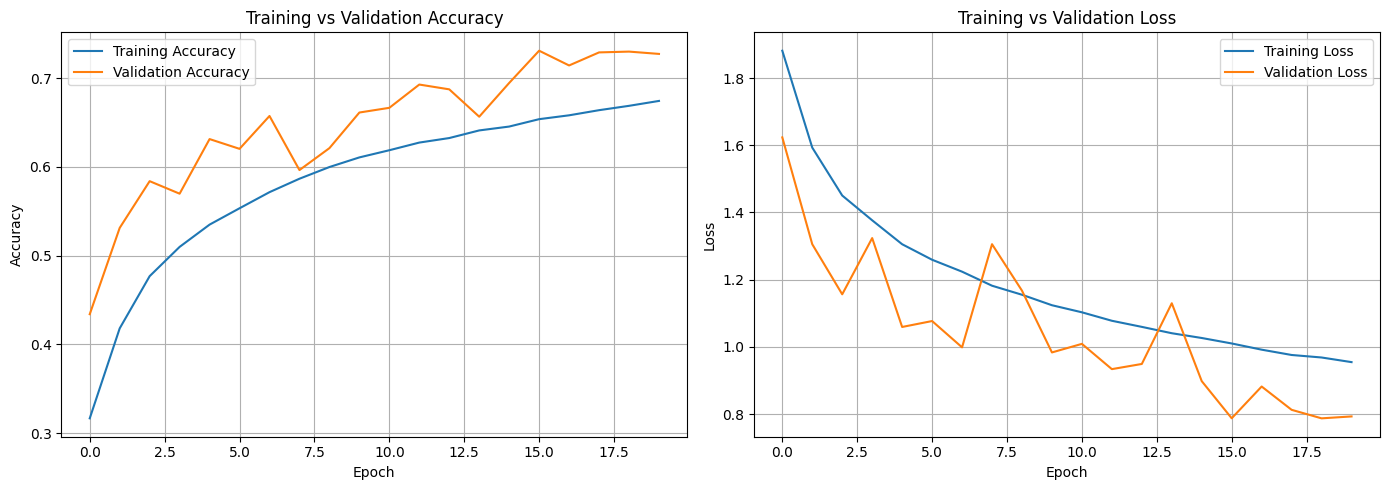

In [12]:
# Accuracy Plot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/20
782/782 - 87s - 111ms/step - accuracy: 0.1983 - loss: 2.0307 - val_accuracy: 0.3395 - val_loss: 1.7550 - learning_rate: 1.0000e-03
Epoch 2/20
782/782 - 84s - 107ms/step - accuracy: 0.2363 - loss: 1.9076 - val_accuracy: 0.3750 - val_loss: 1.6512 - learning_rate: 1.0000e-03
Epoch 3/20
782/782 - 89s - 113ms/step - accuracy: 0.2504 - loss: 1.8704 - val_accuracy: 0.3342 - val_loss: 1.7510 - learning_rate: 1.0000e-03
Epoch 4/20
782/782 - 87s - 112ms/step - accuracy: 0.2613 - loss: 1.8392 - val_accuracy: 0.3637 - val_loss: 1.5939 - learning_rate: 1.0000e-03
Epoch 5/20
782/782 - 89s - 114ms/step - accuracy: 0.2658 - loss: 1.8252 - val_accuracy: 0.4463 - val_loss: 1.5287 - learning_rate: 1.0000e-03
Epoch 6/20
782/782 - 87s - 111ms/step - accuracy: 0.2743 - loss: 1.8014 - val_accuracy: 0.4832 - val_loss: 1.4744 - learning_rate: 1.0000e-03
Epoch 7/20
782/782 - 84s - 108ms/step - accuracy: 0.2817 - loss: 1.7888 - val_accuracy: 0.4921 - val_loss: 1.4271 - learning_rate: 1.0000e-03
Epoch 

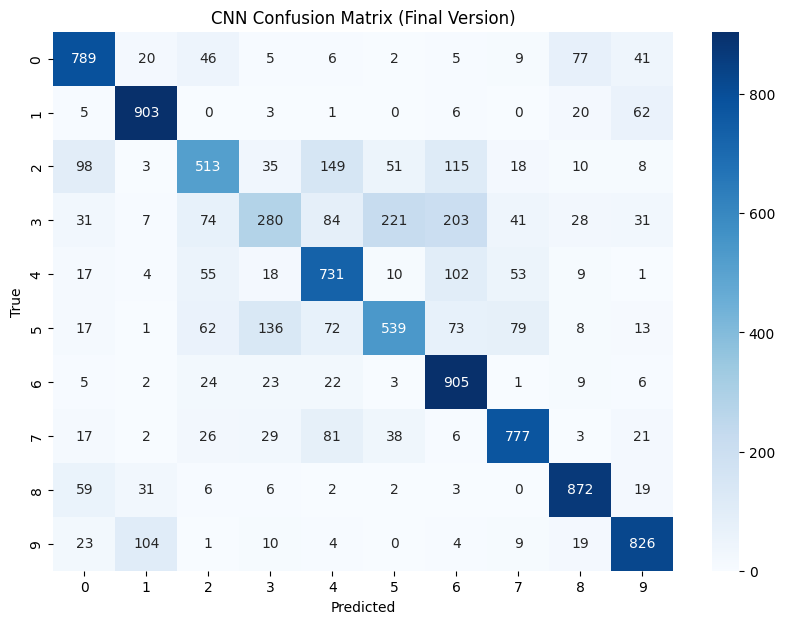

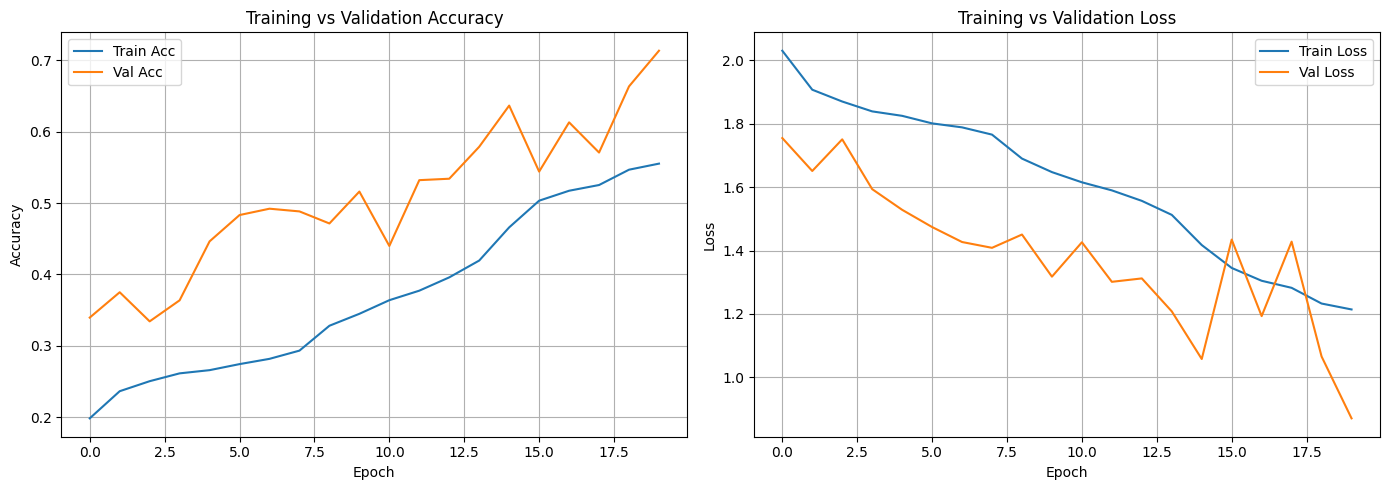

In [ ]:
#WORSE PARAMETERS

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),
    layers.RandomContrast(0.1)
])

# CNN model
cnn_model = Sequential([
    Input(shape=(32, 32, 3)),
    data_augmentation,

    Conv2D(32, (3, 3), padding='same'),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    tf.keras.layers.ReLU(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train
history = cnn_model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)

# Predict
y_pred_probs = cnn_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Evaluation
print(" CNN Evaluation (Norm + Dropout + Aug + BN + Callbacks):")
print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision: {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"Recall:    {recall_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1-Score:  {f1_score(y_true, y_pred, average='macro'):.4f}")
print(f"MCC:       {matthews_corrcoef(y_true, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix (Final Version)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Accuracy and loss plots
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/20
782/782 - 35s - 44ms/step - accuracy: 0.3633 - loss: 1.7098 - val_accuracy: 0.3426 - val_loss: 1.7916 - learning_rate: 0.0010
Epoch 2/20
782/782 - 33s - 42ms/step - accuracy: 0.4704 - loss: 1.4145 - val_accuracy: 0.5688 - val_loss: 1.2119 - learning_rate: 0.0010
Epoch 3/20
782/782 - 32s - 41ms/step - accuracy: 0.5131 - loss: 1.3083 - val_accuracy: 0.6272 - val_loss: 1.0994 - learning_rate: 0.0010
Epoch 4/20
782/782 - 31s - 40ms/step - accuracy: 0.5472 - loss: 1.2219 - val_accuracy: 0.5475 - val_loss: 1.2574 - learning_rate: 0.0010
Epoch 5/20
782/782 - 31s - 40ms/step - accuracy: 0.5688 - loss: 1.1726 - val_accuracy: 0.5974 - val_loss: 1.1624 - learning_rate: 0.0010
Epoch 6/20
782/782 - 32s - 40ms/step - accuracy: 0.5884 - loss: 1.1164 - val_accuracy: 0.6096 - val_loss: 1.1020 - learning_rate: 0.0010
Epoch 7/20
782/782 - 32s - 41ms/step - accuracy: 0.6050 - loss: 1.0711 - val_accuracy: 0.6670 - val_loss: 0.9637 - learning_rate: 0.0010
Epoch 8/20
782/782 - 32s - 41ms/step - ac

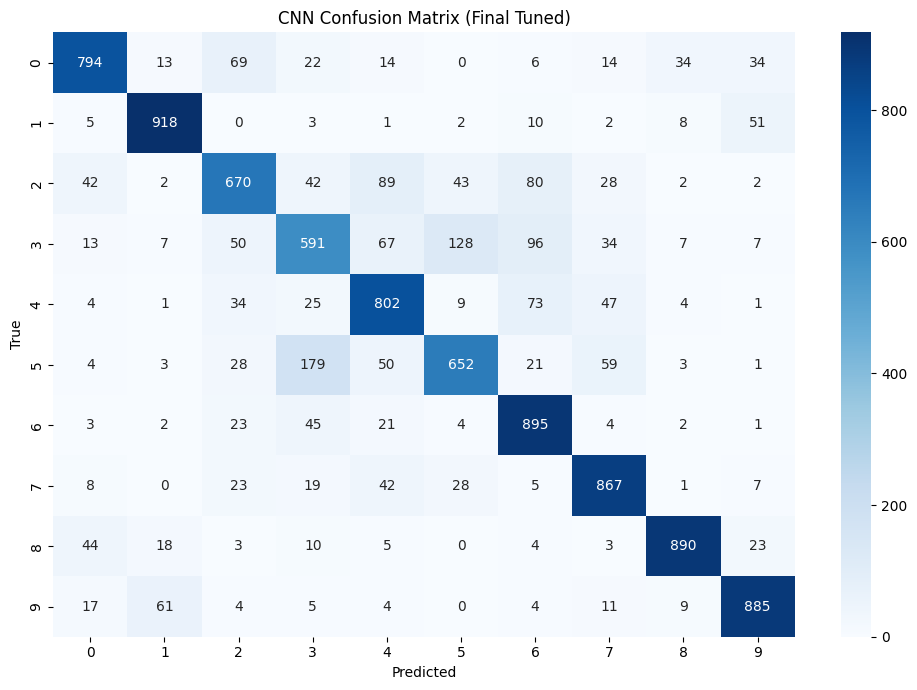

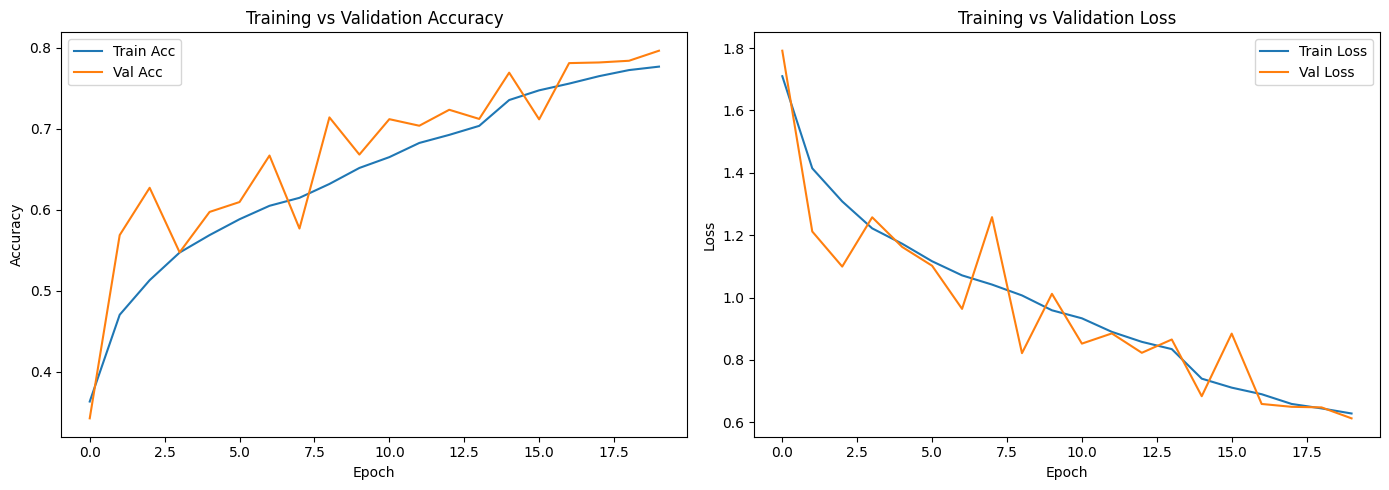

In [ ]:
#NEW PARAMETERS. BETTER RESULTS


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization, ReLU)
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import seaborn as sns

#  Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Mild Data Augmentation 
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.02)
])

#  CNN Model Architecture
cnn_model = Sequential([
    Input(shape=(32, 32, 3)),
    data_augmentation,

    Conv2D(32, (3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

#  Callbacks 
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

#  Train 
history = cnn_model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)

#  Predict and Evaluate
y_pred_probs = cnn_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
mcc = matthews_corrcoef(y_true, y_pred)

print(" CNN Evaluation (Final Tuned Version):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))

#  Confusion Matrix 
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix (Final Tuned)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

#  Plot Accuracy & Loss 
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/30
782/782 - 78s - 100ms/step - accuracy: 0.3461 - loss: 1.7421 - val_accuracy: 0.4694 - val_loss: 1.5496 - learning_rate: 1.0000e-03
Epoch 2/30
782/782 - 72s - 92ms/step - accuracy: 0.4421 - loss: 1.4772 - val_accuracy: 0.5604 - val_loss: 1.2057 - learning_rate: 1.0000e-03
Epoch 3/30
782/782 - 72s - 92ms/step - accuracy: 0.4782 - loss: 1.3757 - val_accuracy: 0.6110 - val_loss: 1.1492 - learning_rate: 1.0000e-03
Epoch 4/30
782/782 - 71s - 91ms/step - accuracy: 0.5051 - loss: 1.3077 - val_accuracy: 0.5515 - val_loss: 1.2778 - learning_rate: 1.0000e-03
Epoch 5/30
782/782 - 71s - 91ms/step - accuracy: 0.5254 - loss: 1.2508 - val_accuracy: 0.6364 - val_loss: 1.0364 - learning_rate: 1.0000e-03
Epoch 6/30
782/782 - 73s - 93ms/step - accuracy: 0.5403 - loss: 1.2128 - val_accuracy: 0.5600 - val_loss: 1.2059 - learning_rate: 1.0000e-03
Epoch 7/30
782/782 - 71s - 91ms/step - accuracy: 0.5539 - loss: 1.1746 - val_accuracy: 0.6354 - val_loss: 1.1017 - learning_rate: 1.0000e-03
Epoch 8/30
7

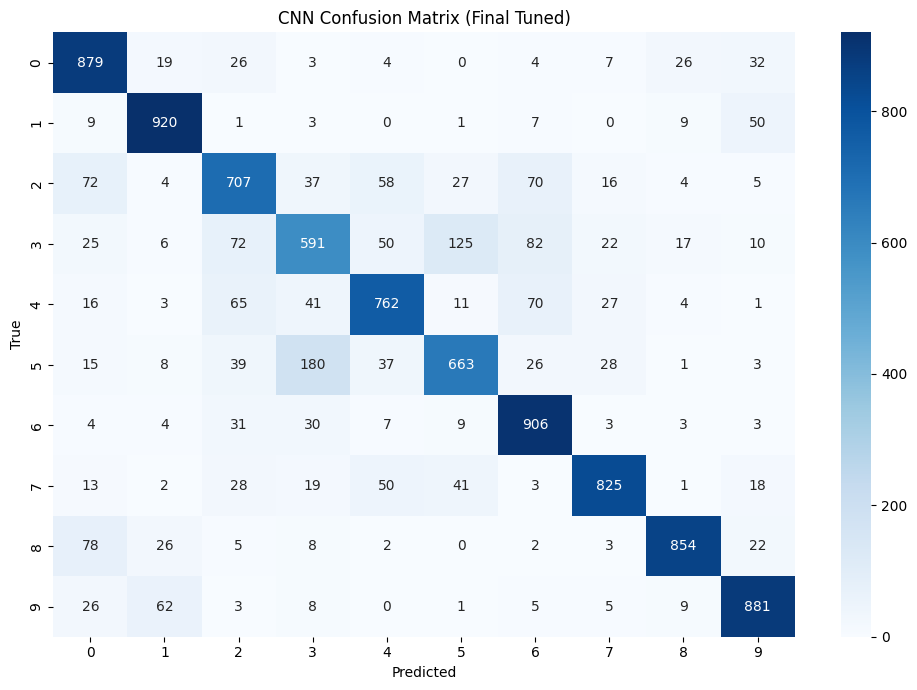

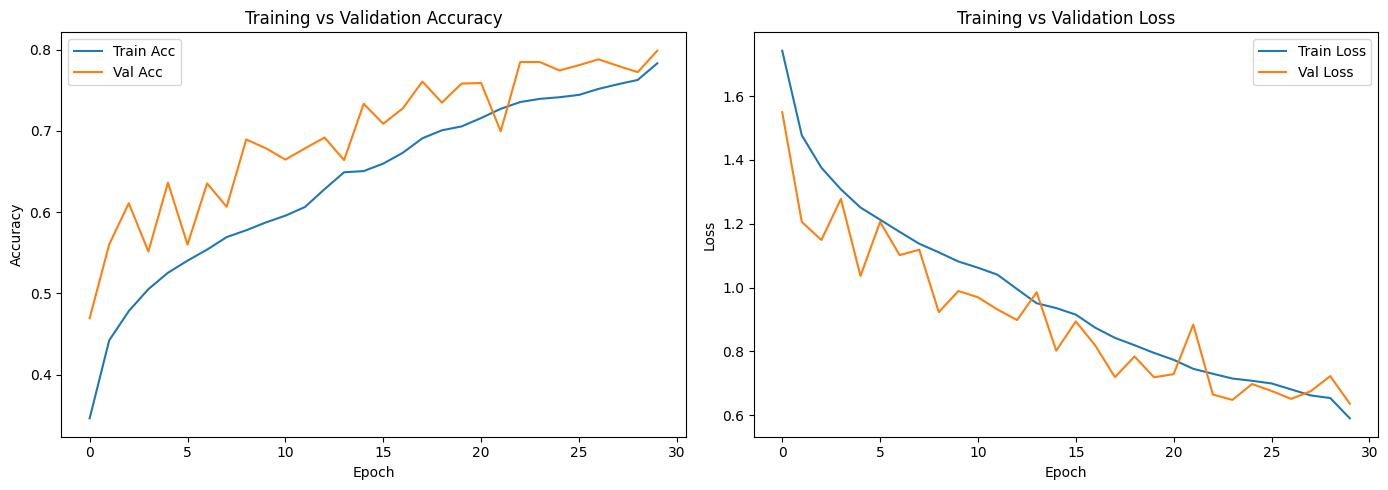

In [ ]:
#TRYING WITH 30 EPOCH


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization, ReLU)
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import seaborn as sns

#  Load CIFAR-10 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

#  Mild Data Augmentation 
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.02)
])

# CNN Model Architecture 
cnn_model = Sequential([
    Input(shape=(32, 32, 3)),
    data_augmentation,

    Conv2D(32, (3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

#  Callbacks 
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

#  Train 
history = cnn_model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)

#  Predict and Evaluate
y_pred_probs = cnn_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
mcc = matthews_corrcoef(y_true, y_pred)

print(" CNN Evaluation (Final Tuned Version):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))

#  Confusion Matrix 
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix (Final Tuned)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# Plot Accuracy & Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()


OPTIMIZING AND EXPLORING MLP ALGORITHM 

/Users/ahmetyasirbeydili/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 - 15s - 20ms/step - accuracy: 0.2243 - loss: 2.0770 - val_accuracy: 0.3142 - val_loss: 1.9111
Epoch 2/20
782/782 - 17s - 21ms/step - accuracy: 0.2698 - loss: 1.9583 - val_accuracy: 0.3224 - val_loss: 1.8728
Epoch 3/20
782/782 - 20s - 26ms/step - accuracy: 0.2918 - loss: 1.9151 - val_accuracy: 0.3326 - val_loss: 1.8579
Epoch 4/20
782/782 - 18s - 24ms/step - accuracy: 0.3009 - loss: 1.8895 - val_accuracy: 0.3528 - val_loss: 1.8146
Epoch 5/20
782/782 - 17s - 21ms/step - accuracy: 0.3110 - loss: 1.8696 - val_accuracy: 0.3549 - val_loss: 1.8366
Epoch 6/20
782/782 - 19s - 24ms/step - accuracy: 0.3196 - loss: 1.8570 - val_accuracy: 0.3649 - val_loss: 1.7894
Epoch 7/20
782/782 - 17s - 21ms/step - accuracy: 0.3207 - loss: 1.8504 - val_accuracy: 0.3773 - val_loss: 1.7706
Epoch 8/20
782/782 - 14s - 18ms/step - accuracy: 0.3289 - loss: 1.8382 - val_accuracy: 0.3752 - val_loss: 1.7776
Epoch 9/20
782/782 - 14s - 18ms/step - accuracy: 0.3294 - loss: 1.8287 - val_accuracy: 0.3730 - 

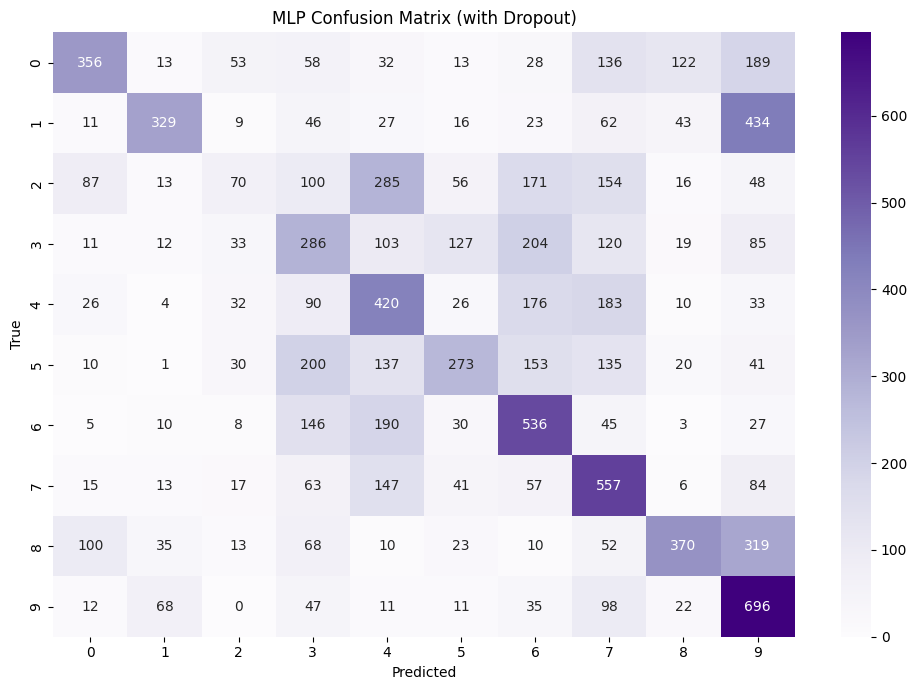

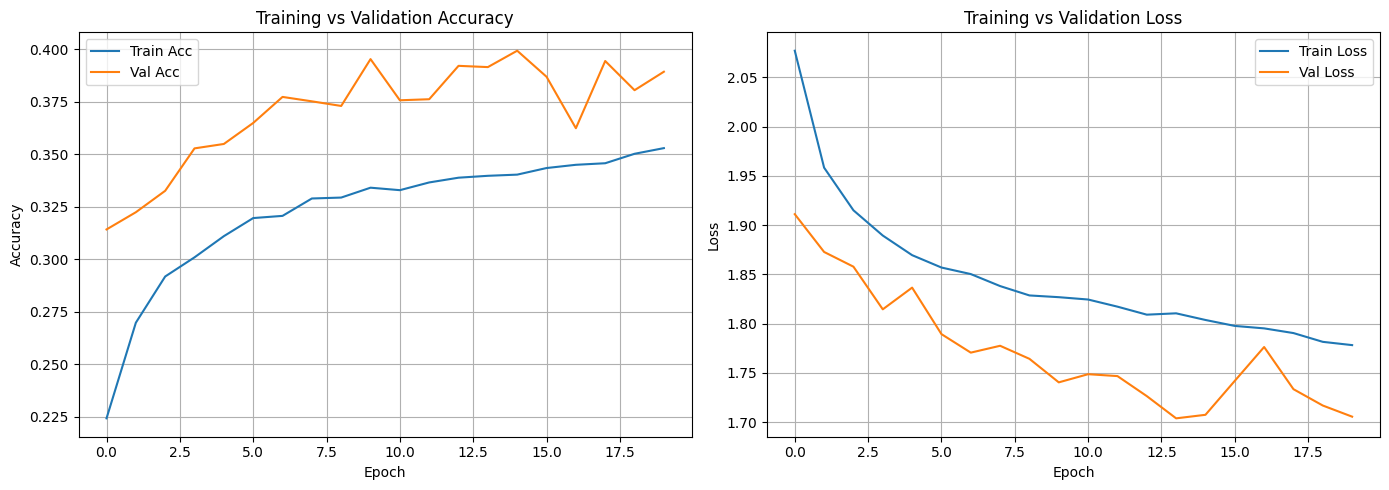

In [ ]:
#MLP WITH JUST DROPOUT AND SCORE IS VERY LOW

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Build MLP model with Dropout
mlp_model_dropout = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
mlp_model_dropout.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
history_mlp_dropout = mlp_model_dropout.fit(
    x_train_flat, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_data=(x_test_flat, y_test_cat),
    verbose=2
)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict class labels
y_pred_mlp_probs = mlp_model_dropout.predict(x_test_flat)
y_pred_mlp = np.argmax(y_pred_mlp_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Compute metrics
accuracy = accuracy_score(y_true, y_pred_mlp)
precision = precision_score(y_true, y_pred_mlp, average='macro')
recall = recall_score(y_true, y_pred_mlp, average='macro')
f1 = f1_score(y_true, y_pred_mlp, average='macro')
mcc = matthews_corrcoef(y_true, y_pred_mlp)

# Print results
print(" MLP Evaluation (with Dropout):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred_mlp))

#  Confusion Matrix
cm = confusion_matrix(y_true, y_pred_mlp)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("MLP Confusion Matrix (with Dropout)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

#  Training vs Validation Accuracy and Loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_mlp_dropout.history['accuracy'], label='Train Acc')
plt.plot(history_mlp_dropout.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_mlp_dropout.history['loss'], label='Train Loss')
plt.plot(history_mlp_dropout.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


/Users/ahmetyasirbeydili/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 - 20s - 25ms/step - accuracy: 0.2599 - loss: 2.1916 - val_accuracy: 0.3345 - val_loss: 1.8135
Epoch 2/20
782/782 - 17s - 22ms/step - accuracy: 0.3303 - loss: 1.8521 - val_accuracy: 0.3592 - val_loss: 1.7983
Epoch 3/20
782/782 - 16s - 21ms/step - accuracy: 0.3415 - loss: 1.8277 - val_accuracy: 0.3602 - val_loss: 1.7648
Epoch 4/20
782/782 - 14s - 18ms/step - accuracy: 0.3425 - loss: 1.8205 - val_accuracy: 0.4016 - val_loss: 1.6765
Epoch 5/20
782/782 - 16s - 20ms/step - accuracy: 0.3444 - loss: 1.8148 - val_accuracy: 0.4063 - val_loss: 1.6628
Epoch 6/20
782/782 - 19s - 25ms/step - accuracy: 0.3458 - loss: 1.8097 - val_accuracy: 0.3759 - val_loss: 1.7019
Epoch 7/20
782/782 - 21s - 27ms/step - accuracy: 0.3483 - loss: 1.8051 - val_accuracy: 0.4005 - val_loss: 1.6670
Epoch 8/20
782/782 - 15s - 20ms/step - accuracy: 0.3596 - loss: 1.7887 - val_accuracy: 0.3960 - val_loss: 1.6600
Epoch 9/20
782/782 - 15s - 19ms/step - accuracy: 0.3623 - loss: 1.7746 - val_accuracy: 0.4252 - 

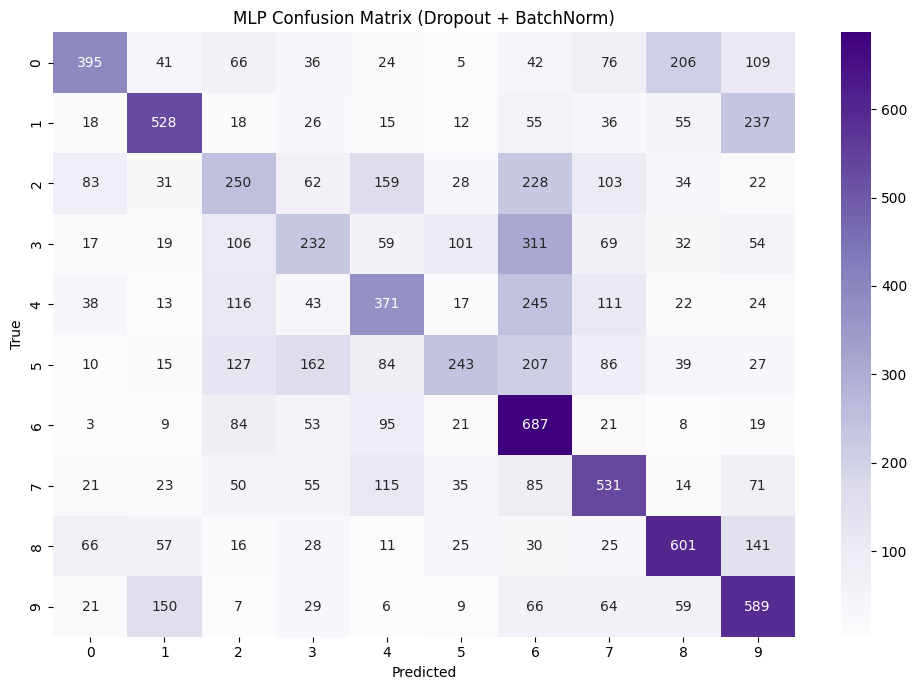

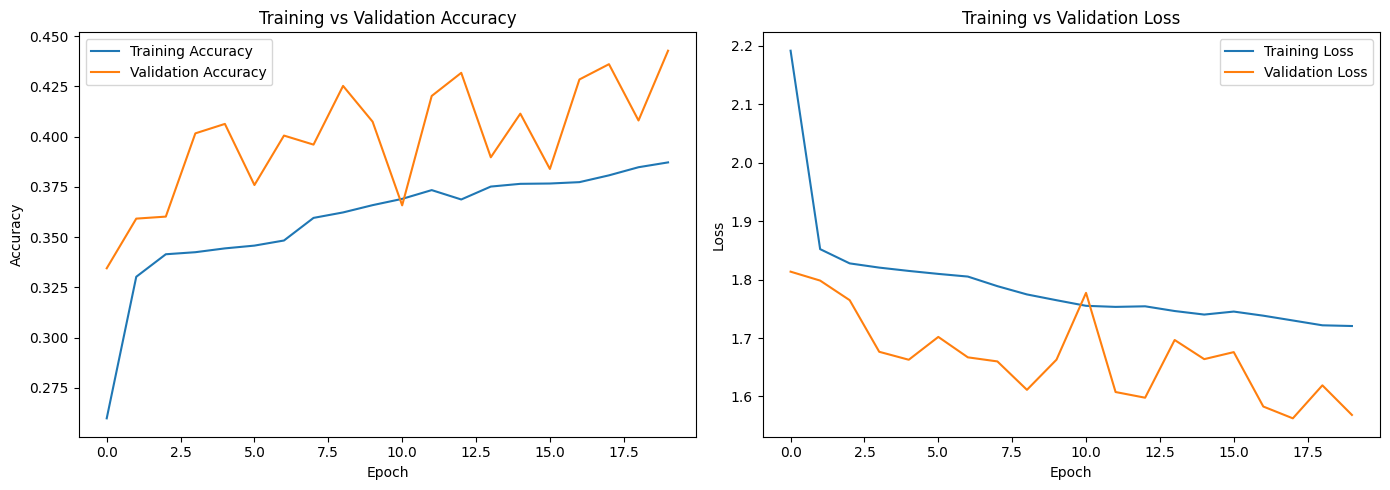

In [ ]:
#MLP WITH BATCH NORMALIZATION INCLUDED

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, classification_report,
    confusion_matrix
)

# Define model
mlp_model_bn = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

#  Compile
mlp_model_bn.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

#  Train
history_bn = mlp_model_bn.fit(
    x_train_flat, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_data=(x_test_flat, y_test_cat),
    verbose=2
)

#  Predictions
y_pred_probs_bn = mlp_model_bn.predict(x_test_flat)
y_pred_bn = np.argmax(y_pred_probs_bn, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

#  Evaluation
print(" MLP Evaluation (with Dropout + BatchNorm):")
print(f"Accuracy: {accuracy_score(y_true, y_pred_bn):.4f}")
print(f"Precision: {precision_score(y_true, y_pred_bn, average='macro'):.4f}")
print(f"Recall: {recall_score(y_true, y_pred_bn, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_true, y_pred_bn, average='macro'):.4f}")
print(f"MCC: {matthews_corrcoef(y_true, y_pred_bn):.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred_bn))

#  Confusion Matrix
cm = confusion_matrix(y_true, y_pred_bn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("MLP Confusion Matrix (Dropout + BatchNorm)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

#  Accuracy and Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_bn.history['accuracy'], label='Training Accuracy')
plt.plot(history_bn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_bn.history['loss'], label='Training Loss')
plt.plot(history_bn.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


/Users/ahmetyasirbeydili/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 - 18s - 23ms/step - accuracy: 0.3931 - loss: 1.7115 - val_accuracy: 0.3333 - val_loss: 1.9193
Epoch 2/20
782/782 - 12s - 16ms/step - accuracy: 0.4533 - loss: 1.5321 - val_accuracy: 0.3821 - val_loss: 1.7473
Epoch 3/20
782/782 - 16s - 20ms/step - accuracy: 0.4795 - loss: 1.4584 - val_accuracy: 0.4114 - val_loss: 1.6544
Epoch 4/20
782/782 - 15s - 19ms/step - accuracy: 0.5068 - loss: 1.3939 - val_accuracy: 0.4584 - val_loss: 1.5214
Epoch 5/20
782/782 - 15s - 19ms/step - accuracy: 0.5198 - loss: 1.3515 - val_accuracy: 0.4324 - val_loss: 1.6019
Epoch 6/20
782/782 - 15s - 19ms/step - accuracy: 0.5364 - loss: 1.2951 - val_accuracy: 0.4666 - val_loss: 1.5049
Epoch 7/20
782/782 - 15s - 19ms/step - accuracy: 0.5536 - loss: 1.2522 - val_accuracy: 0.4822 - val_loss: 1.4924
Epoch 8/20
782/782 - 14s - 18ms/step - accuracy: 0.5660 - loss: 1.2168 - val_accuracy: 0.4245 - val_loss: 1.7245
Epoch 9/20
782/782 - 14s - 18ms/step - accuracy: 0.5802 - loss: 1.1815 - val_accuracy: 0.4228 - 

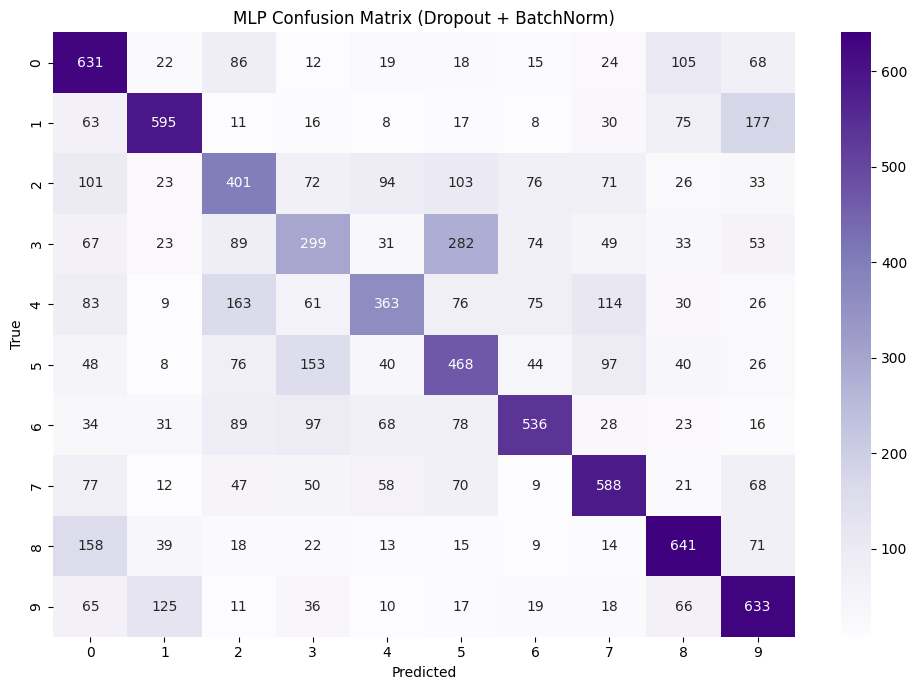

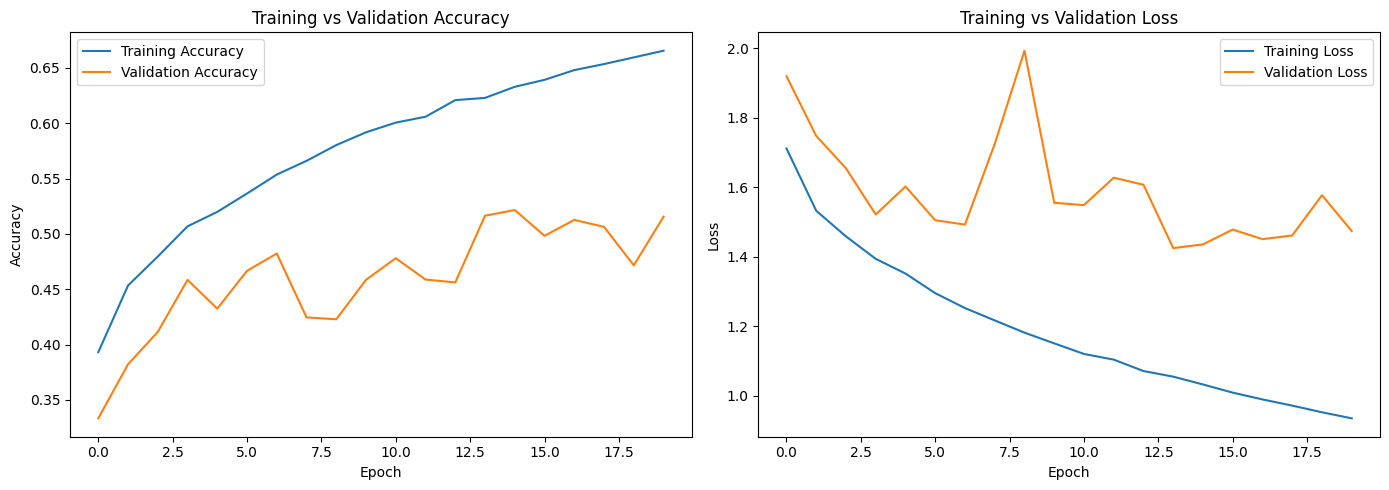

In [ ]:
#MLP WITH BATCH NORMALIZATION INCLUDED BUT NO DROPOUT

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, classification_report,
    confusion_matrix
)

#  Define model
mlp_model_bn = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    BatchNormalization(),

    Dense(256, activation='relu'),
    BatchNormalization(),

    Dense(128, activation='relu'),
    BatchNormalization(),

    Dense(10, activation='softmax')
])

#  Compile
mlp_model_bn.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

#  Train
history_bn = mlp_model_bn.fit(
    x_train_flat, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_data=(x_test_flat, y_test_cat),
    verbose=2
)

#  Predictions
y_pred_probs_bn = mlp_model_bn.predict(x_test_flat)
y_pred_bn = np.argmax(y_pred_probs_bn, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

#  Evaluation
print(" MLP Evaluation (BatchNorm):")
print(f"Accuracy: {accuracy_score(y_true, y_pred_bn):.4f}")
print(f"Precision: {precision_score(y_true, y_pred_bn, average='macro'):.4f}")
print(f"Recall: {recall_score(y_true, y_pred_bn, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_true, y_pred_bn, average='macro'):.4f}")
print(f"MCC: {matthews_corrcoef(y_true, y_pred_bn):.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred_bn))

#  Confusion Matrix
cm = confusion_matrix(y_true, y_pred_bn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("MLP Confusion Matrix (BatchNorm)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

#  Accuracy and Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_bn.history['accuracy'], label='Training Accuracy')
plt.plot(history_bn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_bn.history['loss'], label='Training Loss')
plt.plot(history_bn.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


/Users/ahmetyasirbeydili/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 - 16s - 20ms/step - accuracy: 0.3362 - loss: 1.8934 - val_accuracy: 0.3593 - val_loss: 1.7873 - learning_rate: 0.0010
Epoch 2/20
782/782 - 19s - 24ms/step - accuracy: 0.4019 - loss: 1.6765 - val_accuracy: 0.3853 - val_loss: 1.7158 - learning_rate: 0.0010
Epoch 3/20
782/782 - 13s - 17ms/step - accuracy: 0.4209 - loss: 1.6156 - val_accuracy: 0.4076 - val_loss: 1.6529 - learning_rate: 0.0010
Epoch 4/20
782/782 - 13s - 17ms/step - accuracy: 0.4390 - loss: 1.5732 - val_accuracy: 0.4263 - val_loss: 1.6144 - learning_rate: 0.0010
Epoch 5/20
782/782 - 13s - 16ms/step - accuracy: 0.4415 - loss: 1.5596 - val_accuracy: 0.4652 - val_loss: 1.5189 - learning_rate: 0.0010
Epoch 6/20
782/782 - 13s - 16ms/step - accuracy: 0.4495 - loss: 1.5467 - val_accuracy: 0.4626 - val_loss: 1.5045 - learning_rate: 0.0010
Epoch 7/20
782/782 - 13s - 17ms/step - accuracy: 0.4599 - loss: 1.5149 - val_accuracy: 0.4394 - val_loss: 1.5970 - learning_rate: 0.0010
Epoch 8/20
782/782 - 13s - 17ms/step - ac

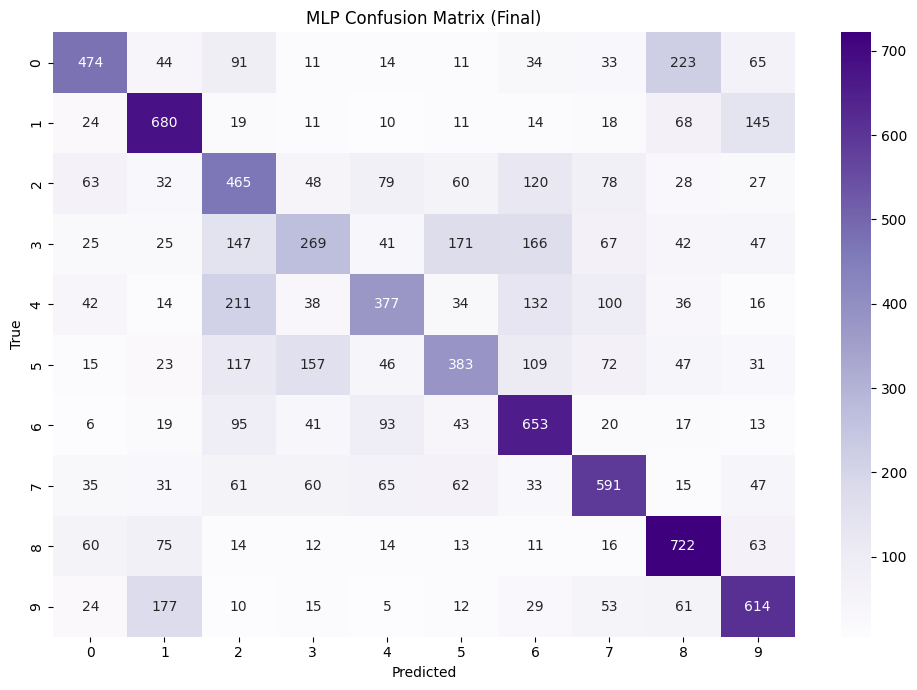

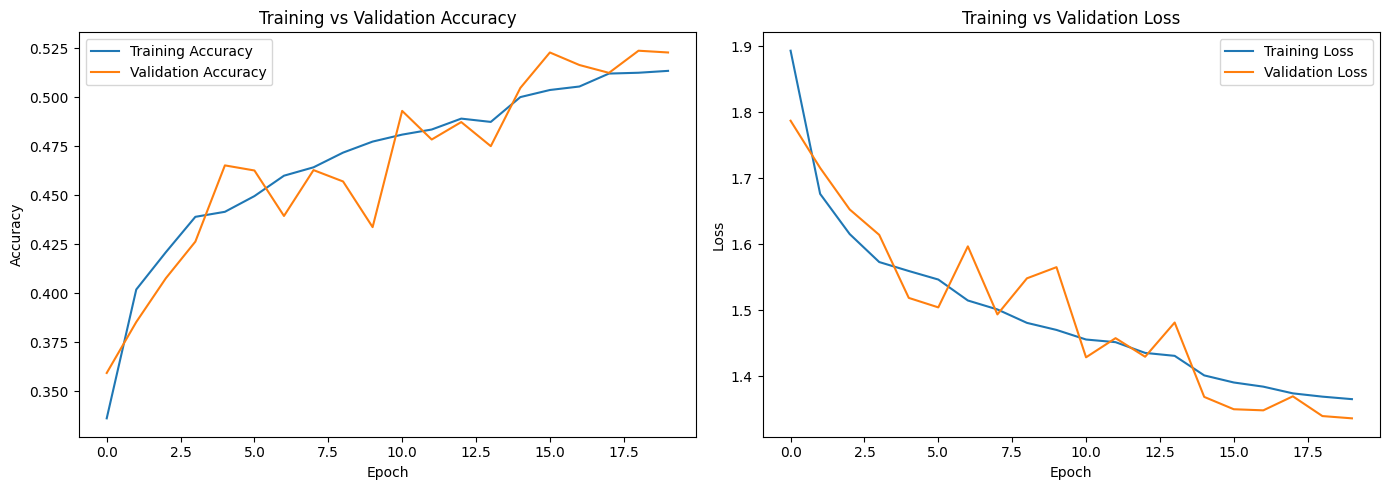

In [ ]:
#Final MLP Implementation with BatchNorm, Dropout & Callbacks

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, classification_report,
    confusion_matrix
)

# Build model
mlp_model = Sequential([
    Dense(512, input_shape=(3072,), activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

mlp_model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Fit model
history = mlp_model.fit(
    x_train_flat, y_train_cat,
    validation_data=(x_test_flat, y_test_cat),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)

# Predictions
y_pred_probs = mlp_model.predict(x_test_flat)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

#  Evaluation
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
mcc = matthews_corrcoef(y_true, y_pred)
print(" MLP Evaluation (Final + BN + Dropout + Callbacks):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("MLP Confusion Matrix (Final)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

#  Accuracy / Loss curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


/Users/ahmetyasirbeydili/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 - 17s - 22ms/step - accuracy: 0.3114 - loss: 1.9425 - val_accuracy: 0.3336 - val_loss: 1.8474 - learning_rate: 0.0010
Epoch 2/20
782/782 - 13s - 17ms/step - accuracy: 0.3884 - loss: 1.7119 - val_accuracy: 0.4141 - val_loss: 1.6405 - learning_rate: 0.0010
Epoch 3/20
782/782 - 13s - 16ms/step - accuracy: 0.4085 - loss: 1.6510 - val_accuracy: 0.3736 - val_loss: 1.8773 - learning_rate: 0.0010
Epoch 4/20
782/782 - 13s - 16ms/step - accuracy: 0.4260 - loss: 1.6119 - val_accuracy: 0.3907 - val_loss: 1.6989 - learning_rate: 0.0010
Epoch 5/20
782/782 - 20s - 26ms/step - accuracy: 0.4341 - loss: 1.5853 - val_accuracy: 0.4558 - val_loss: 1.5165 - learning_rate: 0.0010
Epoch 6/20
782/782 - 15s - 19ms/step - accuracy: 0.4400 - loss: 1.5622 - val_accuracy: 0.4496 - val_loss: 1.5431 - learning_rate: 0.0010
Epoch 7/20
782/782 - 13s - 17ms/step - accuracy: 0.4500 - loss: 1.5513 - val_accuracy: 0.4279 - val_loss: 1.5722 - learning_rate: 0.0010
Epoch 8/20
782/782 - 13s - 16ms/step - ac

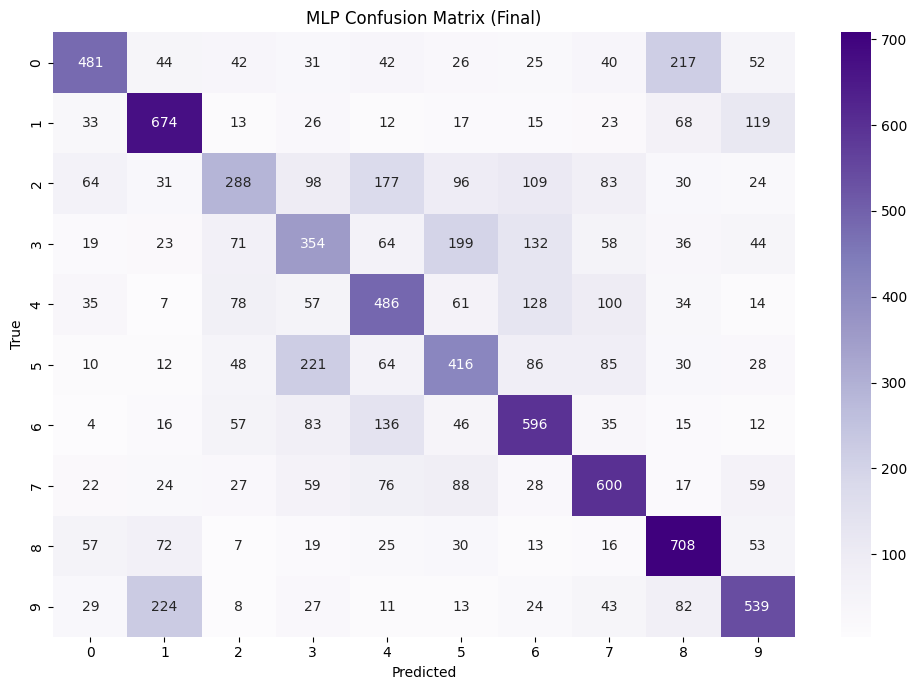

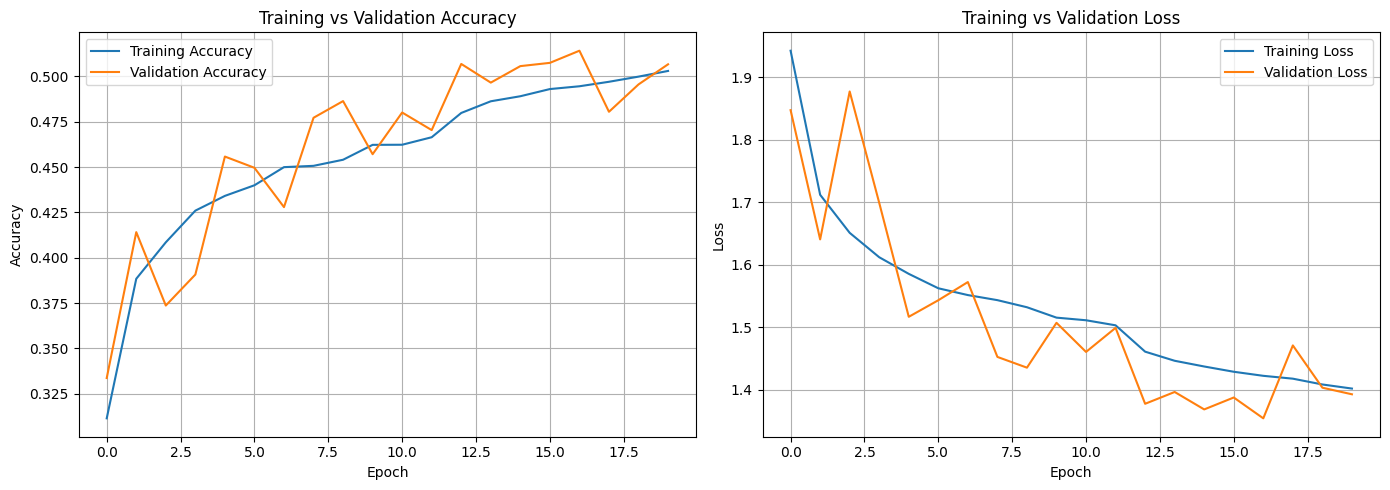

In [ ]:
#FINAL FULL CODE MLP with BN + Dropout + Callbacks AND WITH Extra Layer. BUT IT DIDNT GIVE BETTER SCORE

import numpy as np
import os
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, classification_report,
    confusion_matrix
)

#  Load CIFAR-10
def load_batch(filepath):
    with open(filepath, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
    data = batch['data']
    labels = batch['labels']
    data = data.reshape((len(data), 3, 32, 32)).transpose(0, 2, 3, 1)
    return data, labels

def load_cifar10_data(data_dir):
    x_train, y_train = [], []
    for i in range(1, 6):
        data, labels = load_batch(os.path.join(data_dir, f'data_batch_{i}'))
        x_train.append(data)
        y_train.extend(labels)
    x_train = np.concatenate(x_train)
    y_train = np.array(y_train)
    x_test, y_test = load_batch(os.path.join(data_dir, 'test_batch'))
    return (x_train, y_train), (x_test, y_test)

#  Directory to CIFAR-10 batches
data_dir = '/Users/ahmetyasirbeydili/Desktop/introToML/cifar-10-batches-py'
(x_train, y_train), (x_test, y_test) = load_cifar10_data(data_dir)

#  Normalize and encode
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Flatten
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

#  Build final model
mlp_model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),  # New layer
    BatchNormalization(),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

#  Compile
mlp_model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

#  Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_sched = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

#  Train
history = mlp_model.fit(
    x_train_flat, y_train_cat,
    validation_data=(x_test_flat, y_test_cat),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop, lr_sched],
    verbose=2
)

#  Evaluation
y_pred_probs = mlp_model.predict(x_test_flat)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

#  Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
mcc = matthews_corrcoef(y_true, y_pred)

print(" MLP Evaluation (Final + BN + Dropout + Callbacks):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("MLP Confusion Matrix (Final)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

#  Training vs Validation Accuracy & Loss
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
